In [1]:
import sys
sys.path.append("/home/conradb/git/ifg-ssl")

from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

from fastai.vision.all import *
import torch
from torch.utils.data import DataLoader
from torchvision import datasets

from dino.augment import ImageAugmentationDINO

In [2]:
global_crops_scale = (0.4, 1.)
local_crops_scale = (0.05, 0.4)
local_crops_number = 8

In [3]:
path = untar_data(URLs.IMAGENETTE_160)

In [4]:
test = get_image_files(path/'train')
print(test[101])

/home/conradb/.fastai/data/imagenette2-160/train/n03000684/n03000684_3268.JPEG


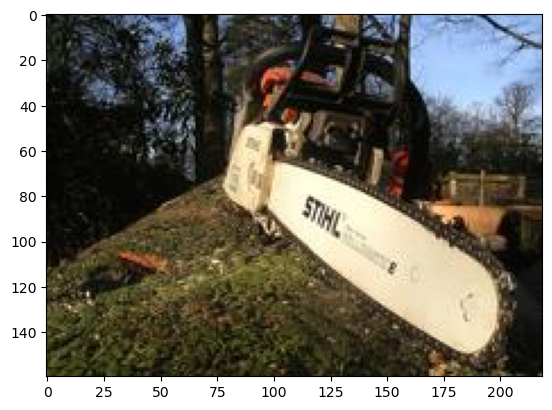

In [5]:
%matplotlib inline
im = Image.open(test[344], 'r')
imshow(np.asarray(im))


In [6]:
transform = ImageAugmentationDINO(global_crops_scale, local_crops_scale, local_crops_number)

train_dataset = datasets.ImageFolder(root=path/'train', transform=transform)

In [7]:
print(train_dataset)
print(len(test))

Dataset ImageFolder
    Number of datapoints: 9469
    Root location: /home/conradb/.fastai/data/imagenette2-160/train
    StandardTransform
Transform: <dino.augment.ImageAugmentationDINO object at 0x7f897e04d6a0>
9469


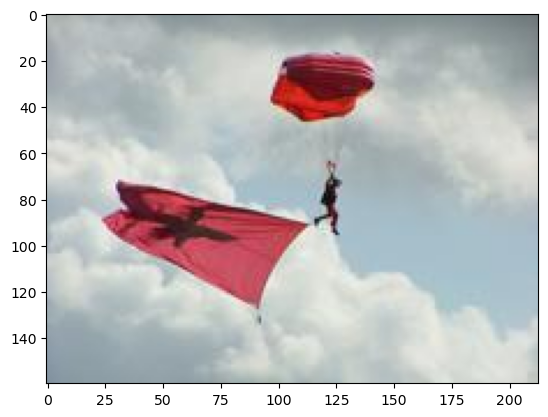

In [8]:
%matplotlib inline
im = Image.open(train_dataset.imgs[9060][0], 'r')
imshow(np.asarray(im))

In [9]:
data_loader = DataLoader(train_dataset, shuffle=False, batch_size=2)

In [10]:
for i in data_loader:
    print(i)

NameError: name 'random' is not defined